In [1]:
'''
载入分析中需要使用的包，并设置显示与绘图环境
'''
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline
% config InlineBackend.figure_format = 'svg'
matplotlib.rcParams['font.sans-serif'] = ["simhei","Whitney Book"]
pd.set_option('display.precision', 2)

In [2]:
# 调用pandas包，读取xlsx格式样本数据文件
loanData = pd.read_excel('data/消费金融数据.xlsx')

## 数据描述

In [3]:
loanData.head(2)

,公司名称,城市,贷款金额,期限,月供,还款总费用,月管理费,期限最低范围,期限最高范围,还款方式,放款日期,审批时间,担保方式,申请人数,申请条件
0,中腾信金融信息服务（上海）有限公司北京分公司,北京,10万元,12月,9225,1.07,月管理费 1.60%,1,12,分期还款,1,1.0,信用贷,198,北京牌照车辆、全款车、购买三个月以上1、名下有北京牌照车辆2、全款车、购买三个月以上3、信用...
1,北京森强国际投资担保有限公司,北京,10万元,12月,10046,2.06,月管理费 3.00%,1,120,到期还款,1,1.0,抵押贷,44,名下有车、北京牌照、有稳定还款来源1、名下有车2、北京牌照3、有稳定还款来源温馨提示：名下有...


In [4]:
loanData.describe()

,月供,还款总费用,期限最低范围,期限最高范围,审批时间,申请人数
count,1046.00,1046.00,1046.00,1046.00,1044.00,1046.00
mean,9984.28,1.99,8.36,36.66,2.00,1200.87
std,739.59,0.87,4.46,22.86,1.71,4509.14
min,8333.00,0.00,1.00,12.00,0.00,0.00
25%,9333.00,1.22,3.00,36.00,1.00,0.00
50%,10133.00,2.16,12.00,36.00,2.00,33.00
75%,10633.00,2.76,12.00,36.00,2.00,462.00
max,12633.00,5.16,12.00,360.00,21.00,62898.00


In [5]:
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 15 columns):
公司名称      1046 non-null object
城市        1046 non-null object
贷款金额      1046 non-null object
期限        1046 non-null object
月供        1046 non-null int64
还款总费用     1046 non-null float64
月管理费      1046 non-null object
期限最低范围    1046 non-null int64
期限最高范围    1046 non-null int64
还款方式      1046 non-null object
放款日期      1046 non-null object
审批时间      1044 non-null float64
担保方式      1046 non-null object
申请人数      1046 non-null int64
申请条件      1036 non-null object
dtypes: float64(2), int64(4), object(9)
memory usage: 122.7+ KB


In [6]:
# drop NaNs
loanData = loanData.dropna(axis=0)

In [7]:
loanData['有无申请'] = 0
loanData.loc[loanData['申请人数']>0,'有无申请']=1

In [93]:
loanData.groupby('有无申请').count()['公司名称']

有无申请
0    385
1    649
Name: 公司名称, dtype: int64

In [8]:
# 机构性质分析： 贷款机构分为银行、保险公司、及其他金融公司三类
## 构造一个新列：机构性质
loanData.insert(1,'机构性质',None)
loanData.loc[loanData['公司名称'].str.contains('银行'),'机构性质'] = '银行'
loanData.loc[loanData['公司名称'].str.contains('保险'),'机构性质'] = '保险'
loanData.loc[loanData['机构性质'].isnull(),'机构性质'] = '其他'

In [9]:
## 构造一个新列：城市类别，分为北上广深（一线）及其他城市两类
loanData.insert(3,'城市类别',None)
loanData.loc[(loanData['城市']=='北京'),'城市类别'] = '一线'
loanData.loc[(loanData['城市']=='上海'),'城市类别'] = '一线'
loanData.loc[(loanData['城市']=='广州'),'城市类别'] = '一线'
loanData.loc[(loanData['城市']=='深圳'),'城市类别'] = '一线'
loanData.loc[loanData['城市类别'].isnull(),'城市类别'] = '其他'

In [10]:
# 构造新列：实际年化利率
# 实际年化利率：还款总费用(万）/10(万)*100(%）
loanData.insert(7,'实际年利率',loanData['还款总费用']*10)

In [11]:
loanData['申请条件文本长度']=loanData['申请条件'].str.len()

In [12]:
loanData.head(2)

,公司名称,机构性质,城市,城市类别,贷款金额,期限,月供,实际年利率,还款总费用,月管理费,期限最低范围,期限最高范围,还款方式,放款日期,审批时间,担保方式,申请人数,申请条件,有无申请,申请条件文本长度
0,中腾信金融信息服务（上海）有限公司北京分公司,其他,北京,一线,10万元,12月,9225,10.7,1.07,月管理费 1.60%,1,12,分期还款,1,1.0,信用贷,198,北京牌照车辆、全款车、购买三个月以上1、名下有北京牌照车辆2、全款车、购买三个月以上3、信用...,1,71
1,北京森强国际投资担保有限公司,其他,北京,一线,10万元,12月,10046,20.6,2.06,月管理费 3.00%,1,120,到期还款,1,1.0,抵押贷,44,名下有车、北京牌照、有稳定还款来源1、名下有车2、北京牌照3、有稳定还款来源温馨提示：名下有...,1,64


In [227]:
loanData.groupby('担保方式').count()

,公司名称,机构性质,城市,城市类别,贷款金额,期限,月供,实际年利率,还款总费用,月管理费,期限最低范围,期限最高范围,还款方式,放款日期,审批时间,申请人数,申请条件,有无申请,申请条件文本长度
担保方式,,,,,,,,,,,,,,,,,,,
信用贷,872,872,872,872,872,872,872,872,872,872,872,872,872,872,872,872,872,872,872
抵押贷,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131
担保贷,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
自由选,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27


In [228]:
loanData.groupby('还款方式').count()

,公司名称,机构性质,城市,城市类别,贷款金额,期限,月供,实际年利率,还款总费用,月管理费,期限最低范围,期限最高范围,放款日期,审批时间,担保方式,申请人数,申请条件,有无申请,申请条件文本长度
还款方式,,,,,,,,,,,,,,,,,,,
分期还款,969,969,969,969,969,969,969,969,969,969,969,969,969,969,969,969,969,969,969
到期还款,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53
随借随还,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12


In [171]:
haveLoanbyCity = loanData.groupby(['有无申请','城市类别']).count()['公司名称']

In [147]:
haveLoanbyFirm = loanData.groupby(['有无申请','机构性质']).count()['公司名称']

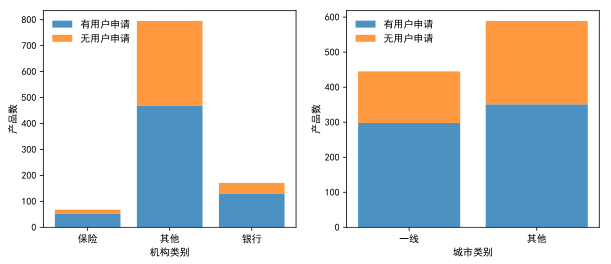

In [178]:
plt.figure(figsize=(10,4))
ax1 = plt.subplot(1,2,1)
plt.bar(haveLoanbyFirm.loc[1].index,haveLoanbyFirm.loc[1].values,label='有用户申请',alpha=0.8)
plt.bar(haveLoanbyFirm.loc[0].index,haveLoanbyFirm.loc[0].values,bottom=haveLoanbyFirm.loc[1].values,label='无用户申请',alpha=0.8)
plt.xlabel('机构类别')
plt.ylabel('产品数')
plt.legend(frameon=False,loc='upper left')

ax2 = plt.subplot(1,2,2)
plt.bar(haveLoanbyCity.loc[1].index,haveLoanbyCity.loc[1].values,label='有用户申请',alpha=0.8)
plt.bar(haveLoanbyCity.loc[0].index,haveLoanbyCity.loc[0].values,bottom=haveLoanbyCity.loc[1].values,label='无用户申请',alpha=0.8)
plt.xlabel('城市类别')
plt.ylabel('产品数')
plt.legend(frameon=False,loc='upper left')

plt.savefig('机构信息.png',transparent=True,dpi=600)

In [180]:
haveLoanMean = loanData.groupby('有无申请').mean()

In [181]:
haveLoanMean.columns

Index(['月供', '实际年利率', '还款总费用', '期限最低范围', '期限最高范围', '审批时间', '申请人数', '申请条件文本长度'], dtype='object')

In [198]:
loanData_melt = pd.melt(loanData,
                    id_vars=['有无申请'],
                    value_vars=['实际年利率','期限最低范围', '期限最高范围', '审批时间', '申请条件文本长度'],
                    var_name = 'vars')

In [199]:
loanData_melt.head(5)

In [218]:
loanData_melt.loc[loanData_melt['有无申请']==1,'有无申请'] = '有用户申请'
loanData_melt.loc[loanData_melt['有无申请']==0,'有无申请'] = '无用户申请'

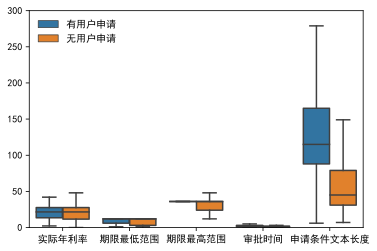

In [226]:
plt.figure()
sns.boxplot(x='vars',y='value',hue='有无申请',data=loanData_melt,fliersize=0)
plt.ylim(0,300)
plt.ylabel('')
plt.xlabel('')
plt.legend(frameon=False)
plt.savefig('贷款信息.png',transparent=True,dpi=600)

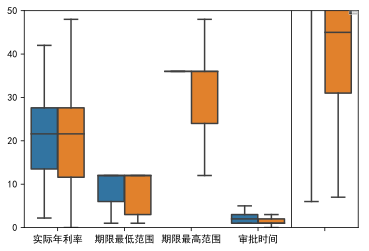

In [242]:
plt.figure()
sns.boxplot(x='vars',y='value',hue='有无申请',data=loanData_melt,fliersize=0)
plt.ylim(0,50)
plt.ylabel('')
plt.xlabel('')
plt.xticks(np.arange(0,5),['实际年利率','期限最低范围', '期限最高范围', '审批时间'])
plt.axvline(x=3.5,lw=0.8,c='k')
plt.legend(fontsize=0)
plt.savefig('贷款信息小.png',transparent=True,dpi=600)

In [14]:
# 构造用于逻辑回归/决策树的变量
# 使用one-hot encoding 处理类别特征
loanData_OHE = pd.get_dummies(loanData,columns=['机构性质','城市类别','还款方式','担保方式'])

In [15]:
loanData_OHE.columns

Index(['公司名称', '城市', '贷款金额', '期限', '月供', '实际年利率', '还款总费用', '月管理费', '期限最低范围',
       '期限最高范围', '放款日期', '审批时间', '申请人数', '申请条件', '有无申请', '申请条件文本长度', '机构性质_保险',
       '机构性质_其他', '机构性质_银行', '城市类别_一线', '城市类别_其他', '还款方式_分期还款', '还款方式_到期还款',
       '还款方式_随借随还', '担保方式_信用贷', '担保方式_抵押贷', '担保方式_担保贷', '担保方式_自由选'],
      dtype='object')

In [67]:
X = loanData_OHE[['实际年利率', '期限最低范围','期限最高范围', '放款日期', '审批时间', 
                  '申请条件文本长度', '机构性质_保险', '机构性质_其他', '机构性质_银行', 
                  '城市类别_一线', '城市类别_其他', '还款方式_分期还款', '还款方式_到期还款', 
                  '还款方式_随借随还','担保方式_信用贷', '担保方式_抵押贷', '担保方式_担保贷', 
                  '担保方式_自由选']]
y = loanData_OHE['有无申请']

## 变量统计描述

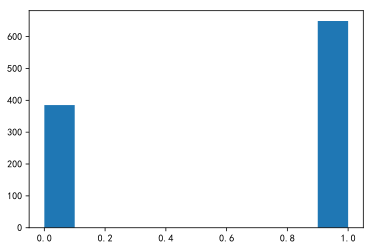

In [17]:
# check sampling balance
plt.figure()
y.hist(grid=False)
plt.show()

In [68]:
X.columns

Index(['实际年利率', '期限最低范围', '期限最高范围', '放款日期', '审批时间', '申请条件文本长度', '机构性质_保险',
       '机构性质_其他', '机构性质_银行', '城市类别_一线', '城市类别_其他', '还款方式_分期还款', '还款方式_到期还款',
       '还款方式_随借随还', '担保方式_信用贷', '担保方式_抵押贷', '担保方式_担保贷', '担保方式_自由选'],
      dtype='object')

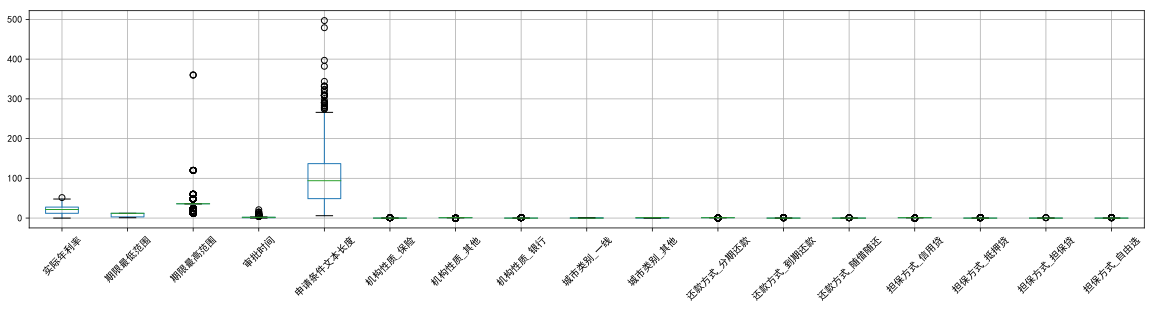

In [19]:
plt.figure(figsize=(20,4))
X.boxplot(rot=45)
plt.show()

## Statsmodels logistic实现

In [69]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1034 entries, 0 to 1045
Data columns (total 18 columns):
实际年利率        1034 non-null float64
期限最低范围       1034 non-null int64
期限最高范围       1034 non-null int64
放款日期         1034 non-null object
审批时间         1034 non-null float64
申请条件文本长度     1034 non-null int64
机构性质_保险      1034 non-null uint8
机构性质_其他      1034 non-null uint8
机构性质_银行      1034 non-null uint8
城市类别_一线      1034 non-null uint8
城市类别_其他      1034 non-null uint8
还款方式_分期还款    1034 non-null uint8
还款方式_到期还款    1034 non-null uint8
还款方式_随借随还    1034 non-null uint8
担保方式_信用贷     1034 non-null uint8
担保方式_抵押贷     1034 non-null uint8
担保方式_担保贷     1034 non-null uint8
担保方式_自由选     1034 non-null uint8
dtypes: float64(2), int64(3), object(1), uint8(12)
memory usage: 108.7+ KB


In [70]:
X_sm = pd.DataFrame(X,dtype='float')
X_sm['有无申请'] = y

In [21]:
# 使用statsmodels package
import statsmodels.api as sm
# 导入formula api可以使statsmodel支持R-like回归语法
import statsmodels.formula.api as smf

C:\Users\Zan\Anaconda\envs\python3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [117]:
# python中没有简单的forward/backward selection函数
# 此处新建立了一个backward selection函数
# 参考 https://planspace.org/20150423-forward_selection_with_statsmodels/
# 增加log-transform功能
def backward_selected(data, response, maxiter=10, logtrans=None):
    """
    Linear model designed by **backward** selection.

    Parameters:
    -----------
    data     : (pandas DataFrame)
               with all possible predictors and response
    response : (string)
               name of response column in data
    logtrans : (string / list of string)
               predictors need to be log-transformed

    Returns:
    --------
    model    : an "optimal" fitted statsmodels linear model
               selected by forward selection
               evaluated by BIC
    """
    # 获取特征名List
    dataColumns = list(data.columns)
    # logtrans列表的变量（包括因变量）添加log用于之后回归的公式
    if(logtrans is not None):
        for i,istr in enumerate(dataColumns):
            if(istr in logtrans):
                dataColumns[i] = 'np.log({0})'.format(istr)
    # 设定逐步回归留下/舍弃的变量集合与列表
    remaining = set(dataColumns)
    remaining.remove(response)
    selected = list(remaining)
    # BIC越低越好，初始值定为一个高值
    current_score, best_score = 1e9, 1e9
    # 进行迭代，迭代停止条件：BIC不再减少，或舍弃全部变量
    niter = 0
    while (niter< maxiter) and remaining and (current_score == best_score):
        niter += 1 
        # 新建/清空（BIC分数，舍弃变量）元组列表
        scores_with_candidates = []
        for candidate in remaining:
            # 按顺序尝试舍弃仍没被舍弃的变量
            sel = remaining.copy()
            sel.remove(candidate)
            sel_list = list(sel)
            # 建立尝试舍弃candidate变量的模型
            formula = "{} ~ {}".format(response,' + '.join(sel_list))
            # score记为本次模型的BIC
            score = smf.logit(formula, data).fit(maxiter=1000,full_output=0,disp=0).bic
            # 记录舍弃的变量和相应的BIC
            scores_with_candidates.append((score, candidate))
        # 对记录的（分数，变量）元组列表按分数由低至高进行排序
        scores_with_candidates.sort(reverse=True)
        # 选择BIC分数最高的变量（并将其出栈-移出列表）
        current_score, current_candidate = scores_with_candidates.pop()
        # 如果当前模型BIC表现优于（即低于）历史最佳模型BIC
        if current_score < best_score:
            # 从变量列表中移除本次移除的变量
            remaining.remove(current_candidate)
            # 打印移除变量提示及历史最佳/当前BIC
            print('REMOVED: \'{0}\'. Prev Score: {1:.2f}. Currently {2:.2f}'
                  .format(current_candidate, best_score, current_score))
            # 更新历史最佳BIC
            best_score = current_score
    # 打印选择后的特征变量
    selected = list(remaining)
    print('=========================================')
    print('SELECTED FEATURES:',selected)
    # 根据选择后的特征建立回归公式
    formula = "{} ~ {}".format(response, ' + '.join(selected))
    # 利用statsmodel的logistic回归
    model = smf.logit(formula, data).fit_regularized(maxiter=1000,alpha=1)
    # 返回选择后的优选模型
    return model

In [ ]:
sm.Logit.fit_regularized()

In [118]:
smlr_best = backward_selected(X_sm,'有无申请',maxiter=20,logtrans=None)

C:\Users\Zan\Anaconda\envs\python3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


REMOVED: '期限最高范围'. Prev Score: 1000000000.00. Currently 1120.55
REMOVED: '放款日期'. Prev Score: 1120.55. Currently 1114.85
REMOVED: '审批时间'. Prev Score: 1114.85. Currently 1108.65
REMOVED: '期限最低范围'. Prev Score: 1108.65. Currently 1103.16
REMOVED: '实际年利率'. Prev Score: 1103.16. Currently 1097.87
REMOVED: '城市类别_一线'. Prev Score: 1097.87. Currently 1097.87
REMOVED: '城市类别_其他'. Prev Score: 1097.87. Currently 1091.20
SELECTED FEATURES: ['机构性质_银行', '担保方式_抵押贷', '担保方式_信用贷', '机构性质_保险', '担保方式_自由选', '担保方式_担保贷', '还款方式_分期还款', '还款方式_到期还款', '申请条件文本长度', '机构性质_其他', '还款方式_随借随还']
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.5016145321491131
            Iterations: 87
            Function evaluations: 92
            Gradient evaluations: 87


C:\Users\Zan\Anaconda\envs\python3\lib\site-packages\statsmodels\discrete\discrete_model.py:1214: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Zan\Anaconda\envs\python3\lib\site-packages\statsmodels\discrete\discrete_model.py:1264: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [119]:
smlr_best.summary()

C:\Users\Zan\Anaconda\envs\python3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Zan\Anaconda\envs\python3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Zan\Anaconda\envs\python3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   有无申请   No. Observations:                 1034
Model:                          Logit   Df Residuals:                     1028
Method:                           MLE   Df Model:                            5
Date:                Thu, 02 Aug 2018   Pseudo R-squ.:                  0.2461
Time:                        08:48:46   Log-Likelihood:                -514.61
converged:                       True   LL-Null:                       -682.64
                                        LLR p-value:                 1.764e-70
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3926      0.314     -4.434      0.000      -2.008      -0.777
机构性质_银行             0        nan        nan        nan         nan         nan
担保方式_抵押贷            0        nan        nan        nan         nan         nan
担保方式_信用贷       0.5050      0.231      2.185      0.029       0.052       0.958
机构性质_保险             0        nan        nan        nan         nan         nan
担保方式_自由选      -1.1299      0.493     -2.293      0.022      -2.096      -0.164
担保方式_担保贷            0        nan        nan        nan         nan         nan
还款方式_分期还款           0        nan        nan        nan         nan         nan
还款方式_到期还款     -0.3770      0.358     -1.054      0.292      -1.078       0.324
申请条件文本长度       0.0230      0.002     12.873      0.000       0.020       0.027
机构性质_其他       -0.6299      0.205     -3.071      0.002      -1.032      -0.228
还款方式_随借随还           0        nan        nan        nan         nan         nan
==============================================================================
"""

In [135]:
# 去掉一些特征，仍然得到比较不错的结果（acc,AUC和BIC）
X_sel = loanData_OHE[['城市类别_一线', '还款方式_分期还款', '还款方式_到期还款', 
                  '担保方式_担保贷', '机构性质_保险', '申请条件文本长度', 
                  '城市类别_其他', '还款方式_随借随还', '担保方式_信用贷', 
                  '担保方式_抵押贷', '担保方式_自由选', '机构性质_其他', 
                  '机构性质_银行']]
y_sel = loanData_OHE['有无申请']

In [120]:
from statsmodels.discrete.discrete_model import Logit
# use statsmodels alternative version of logistic reg.
# get coefficients
print(smlr_best.params)
# get probability prediction
p_smlr_best = smlr_best.predict()

Intercept   -1.39
机构性质_银行      0.00
担保方式_抵押贷     0.00
担保方式_信用贷     0.51
机构性质_保险      0.00
担保方式_自由选    -1.13
担保方式_担保贷     0.00
还款方式_分期还款    0.00
还款方式_到期还款   -0.38
申请条件文本长度     0.02
机构性质_其他     -0.63
还款方式_随借随还    0.00
dtype: float64


In [246]:
# Draw ROC with FPT/TPR arrays
from sklearn.metrics import roc_curve, roc_auc_score
def DrawROC(FPR, TPR, AUC, label=None):
    '''
    Draw ROC with FPT/TPR arrays
    ----------------------------
    Parameters:
    -----------
    FPR   : (np.array, 1D)
            False Positive Rate array under different cut-off threshold.
    TPR   : (np.array, 1D)
            True Positive Rate array under different cut-off threshold.
    AUC   : (float)
            The area under ROC.
    label : (str)
            Prefix that will appear on plot title before reporting AUC.
    '''
    plt.figure()
    plt.plot(FPR,TPR,'-')
    plt.plot([0,1],[0,1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.xlim((0,1))
    plt.ylim((0,1))
    plt.title('AUC: {0:.2f}'.format(AUC),**{'fontname':'Whitney Book'})
    plt.savefig(label+'_ROC.png',transparent=True,dpi=600)

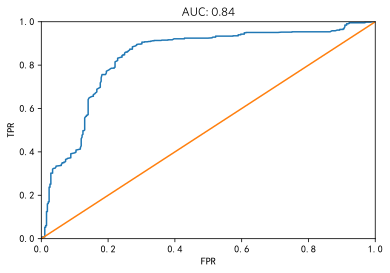

In [247]:
FPR_sm,TPR_sm,_ = roc_curve(y,p_smlr_best)
AUC_sm = roc_auc_score(y,p_smlr_best)
DrawROC(FPR_sm, TPR_sm, AUC_sm,'Statsmodels')

## Sci-kit learn logistic regression 实现

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=0)

In [80]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1,random_state=0)

In [81]:
# fit logistic regression
lr.fit(X_train,y_train)
# make predictions (0-1 prediction)
lr.predict(X_train)
# get model coefficients
print(lr.coef_)
# get accuracy: (TP+TN)/(N+P)
print(lr.score(X_train,y_train))
# get prob. prediction
p_lr = lr.predict_proba(X)[:,1]

[[ 0.01361432  0.02720734 -0.00520924 -0.09587259  0.13152808  0.020943
   0.0601153  -0.76479025 -0.063281   -0.3205948  -0.44736115 -0.13958025
  -0.60364013 -0.02473557  0.42314304 -0.06100641 -0.10764932 -1.02244325]]
0.821935483871


In [82]:
X_train.columns

Index(['实际年利率', '期限最低范围', '期限最高范围', '放款日期', '审批时间', '申请条件文本长度', '机构性质_保险',
       '机构性质_其他', '机构性质_银行', '城市类别_一线', '城市类别_其他', '还款方式_分期还款', '还款方式_到期还款',
       '还款方式_随借随还', '担保方式_信用贷', '担保方式_抵押贷', '担保方式_担保贷', '担保方式_自由选'],
      dtype='object')

In [83]:
print(lr.score(X_test,y_test))

0.779922779923


In [84]:
# fit logistic regression
lr.fit(X,y)
# make predictions (0-1 prediction)
lr.predict(X)
# get model coefficients
print(lr.coef_)
# get accuracy: (TP+TN)/(N+P)
print(lr.score(X,y))
# get prob. prediction
p_lr = lr.predict_proba(X)[:,1]

[[ 0.01368443  0.02069471  0.00212416 -0.06189618  0.11191329  0.02270865
  -0.07950716 -0.76268257 -0.07587651 -0.40741467 -0.51065156 -0.29148826
  -0.57389308 -0.0526849   0.38909039 -0.07277493 -0.17694967 -1.05743202]]
0.820116054159


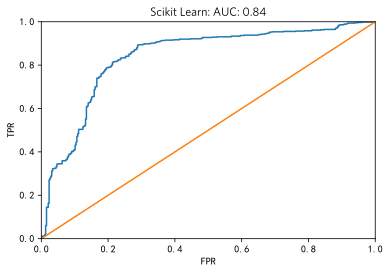

In [85]:
FPR, TPR, thres = roc_curve(y,p_lr)
AUC = roc_auc_score(y,p_lr)
DrawROC(FPR, TPR, AUC, 'Scikit Learn')

## **决策树部分**

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid = {'max_leaf_nodes':range(2,25),'max_depth':range(2,8)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid,
                    cv=10, return_train_score=True)
grid.fit(X_train, y_train)
# inspect best parameters, compute test-set accuracy
print('Best mean cross_validation score: %f'%(grid.best_score_))
print('Best Max_leaf_nodes: {}'.format(grid.best_params_))

Best mean cross_validation score: 0.880000
Best Max_leaf_nodes: {'max_depth': 6, 'max_leaf_nodes': 18}


In [87]:
dtcbest = grid.best_estimator_
dtcbest.fit(X_train,y_train)
print('Test set score: %f'%(dtcbest.score(X_test,y_test)))

Test set score: 0.884170


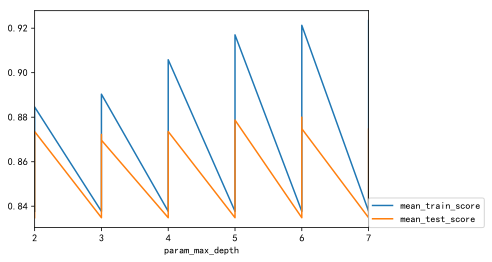

In [88]:
scores = pd.DataFrame(grid.cv_results_)
plt.figure()
scores.plot(x='param_max_depth', y=['mean_train_score', 'mean_test_score'], ax=plt.gca())
plt.legend(loc=(1, 0))
plt.show()

C:\Users\Zan\Anaconda\envs\python3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


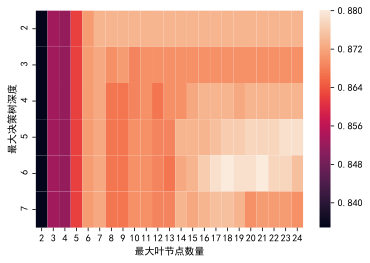

In [105]:
scores = pd.DataFrame(grid.cv_results_)
plt.figure()
sns.heatmap(data = np.reshape(scores.mean_test_score,(6,23)))
plt.ylabel('最大决策树深度')
plt.yticks(np.arange(0,6,1)+0.5,np.arange(2,8,1))
plt.xlabel('最大叶节点数量')
plt.xticks(np.arange(0,23,1)+0.5,np.arange(2,25,1))
plt.show()

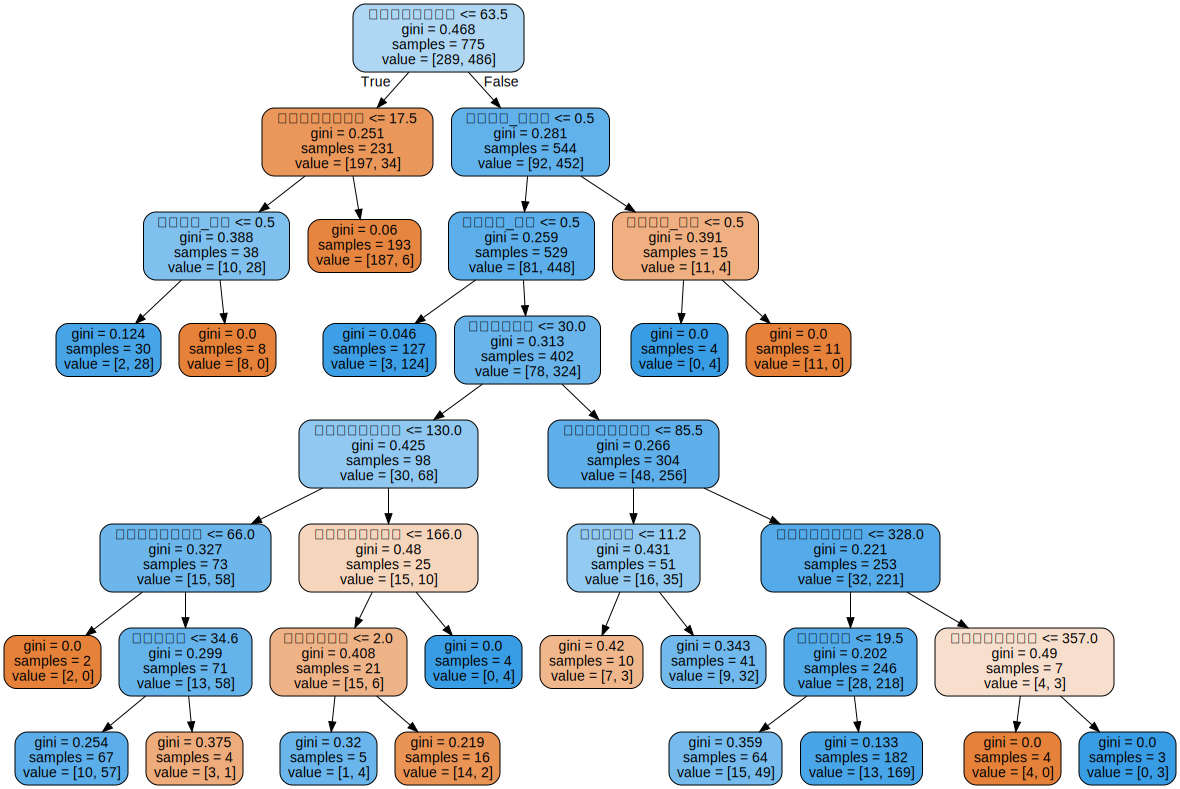

In [90]:
from sklearn.tree import export_graphviz
import graphviz
tree_dot = export_graphviz(dtcbest, out_file=None, feature_names=X.columns, filled=True, rounded=True)
graph = graphviz.Source(tree_dot)  
graph 
# # import from local py file
# from tree_plotting import plot_tree
# plot_tree(tree, feature_names=X.columns, filled=True)

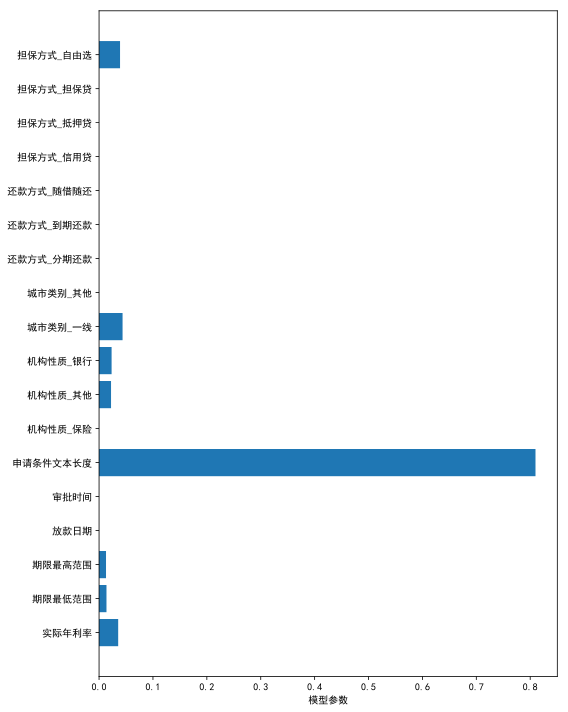

In [254]:
# solution here ...
plt.figure(figsize=(8,10))
plt.barh(range(len(dtcbest.feature_importances_)),dtcbest.feature_importances_)
plt.yticks(range(len(dtcbest.feature_importances_)),X.columns)
plt.xlabel('模型参数')
plt.tight_layout()
plt.savefig('a.jpg',dpi=600)